# NLP - Emotion Classification in Text

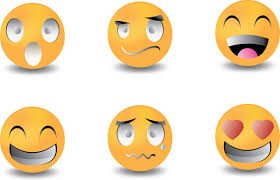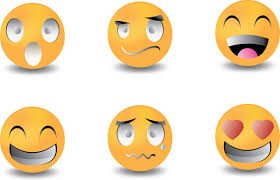

## Objective: 
Develop machine learning models to classify emotions in text samples.

## 1. Loading and Preprocessing 

In [29]:
import pandas as pd
df=pd.read_csv("nlp_dataset.csv")
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [30]:
df.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [31]:
df.shape

(5937, 2)

In [32]:
df.size

11874

In [33]:
df.columns

Index(['Comment', 'Emotion'], dtype='object')

In [34]:
df.describe(include='all')

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [35]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [36]:
df.duplicated().sum()

0

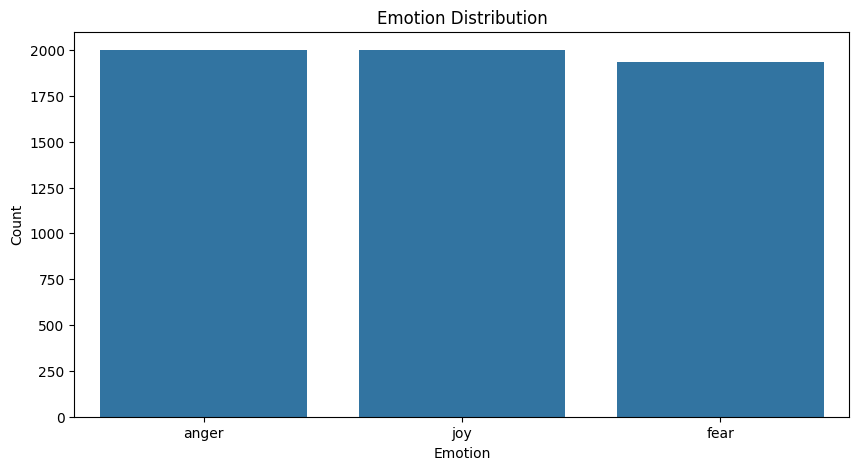

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of emotions
plt.figure(figsize=(10, 5))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index)
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

The bar chart titled "Emotion Distribution" displays the count of three emotions: anger, joy, and fear. Here's a brief overview:

Anger and Joy: Both emotions appear at a similar rate, each close to 2000 instances.
Fear: This emotion occurs somewhat less frequently, with a count exceeding 1500.

In [38]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk  # For text processing
# nltk.download('punkt')  # Uncomment if needed
# nltk.download('stopwords')

In [39]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

In [40]:
# Apply cleaning to comments
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

# Show original and cleaned comments
df[['Comment', 'Cleaned_Comment']]

,Comment,Cleaned_Comment
0,i seriously hate one subject to death but now ...,seriously hate one subject death but now fe...
1,im so full of life i feel appalled,full life feel appalled
2,i sit here to write i start to dig out my feel...,sit here write start dig out feelings and...
3,ive been really angry with r and i feel like a...,ive been really angry with and feel like id...
4,i feel suspicious if there is no one outside l...,feel suspicious there one outside like the...
...,...,...
5932,i begun to feel distressed for you,begun feel distressed for you
5933,i left feeling annoyed and angry thinking that...,left feeling annoyed and angry thinking that ...
5934,i were to ever get married i d have everything...,were ever get married have everything read...
5935,i feel reluctant in applying there because i w...,feel reluctant applying there because want ...


In [41]:
# Tokenization and stopword removal
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Processed_Comment'] = df['Cleaned_Comment'].apply(tokenize_and_remove_stopwords)


In [43]:
df['Processed_Comment']

0       seriously hate one subject death feel reluctan...
1                                 full life feel appalled
2       sit write start dig feelings think afraid acce...
3       ive really angry feel like idiot trusting firs...
4       feel suspicious one outside like rapture happe...
                              ...                        
5932                                begun feel distressed
5933    left feeling annoyed angry thinking center stu...
5934    ever get married everything ready offer got to...
5935    feel reluctant applying want able find company...
5936           wanted apologize feel like heartless bitch
Name: Processed_Comment, Length: 5937, dtype: object

### Preprocessing Techniques and Their Impact on Model Performance

**Lowercasing:**  
Lowercasing is the process of converting all characters in the text to lowercase. This technique standardizes the text, ensuring that variations in capitalization do not create separate entries for the same word. For example, "Hello" and "hello" are treated as the same word. This standardization reduces the number of unique words the model has to process, making the analysis more efficient. By eliminating case sensitivity, the model can focus on the content's meaning rather than being distracted by formatting variations.

**Removal of Punctuation:**  
The removal of punctuation marks, such as commas, periods, and exclamation points, is another essential preprocessing step. Punctuation typically does not add significant meaning in the analysis of text data for emotion classification. By eliminating these marks, we simplify the text, making it easier to process and analyze. This step ensures that punctuation does not interfere with the model's ability to identify and analyze words, thereby leading to better feature extraction and understanding of the text.

**Removal of Short Words:**  
Removing words that are only one or two characters long helps in cleaning the data. These short words, such as "a," "an," and "it," often carry less meaningful information in the context of emotion classification. By removing them, we reduce the noise in the data and allow the model to concentrate on more informative and significant words. This technique helps enhance model performance by focusing the analysis on words that are more likely to contribute valuable information.


## 2. Feature Extraction 

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vec = CountVectorizer()

# Fit and transform the text data
X_vec = vec.fit_transform(df['Processed_Comment'])

# Convert the result to a DataFrame for better readability
X_df = pd.DataFrame(X_vec.toarray(), columns=vec.get_feature_names_out())

# Display the first few rows of the feature matrix
print(X_df.head())


   aac  aaron  abandon  abandoned  abandonment  abbigail  abc  abdomen  \
0    0      0        0          0            0         0    0        0   
1    0      0        0          0            0         0    0        0   
2    0      0        0          0            0         0    0        0   
3    0      0        0          0            0         0    0        0   
4    0      0        0          0            0         0    0        0   

   abelard  abide  ...  zen  zendikar  zero  zest  zhu  zipline  zombies  \
0        0      0  ...    0         0     0     0    0        0        0   
1        0      0  ...    0         0     0     0    0        0        0   
2        0      0  ...    0         0     0     0    0        0        0   
3        0      0  ...    0         0     0     0    0        0        0   
4        0      0  ...    0         0     0     0    0        0        0   

   zone  zonisamide  zumba  
0     0           0      0  
1     0           0      0  
2     0    

CountVectorizer creates a matrix that counts how often each word appears in a document. It works by breaking down the text into words and counting their occurrences. Each row represents a document, each column represents a unique word, and the cell values show the number of times each word appears. This method converts text into numbers but doesn't account for word importance across documents or handle variations of words.


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vec = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vec.fit_transform(df['Processed_Comment'])

# Convert the result to a DataFrame for better readability
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vec.get_feature_names_out())

# Display the first few rows of the feature matrix
print(X_tfidf_df.head())


   aac  aaron  abandon  abandoned  abandonment  abbigail  abc  abdomen  \
0  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   
1  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   
2  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   
3  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   
4  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   

   abelard  abide  ...  zen  zendikar  zero  zest  zhu  zipline  zombies  \
0      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   
1      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   
2      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   
3      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   
4      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   

   zone  zonisamide  zumba  
0   0.0         0.0    0.0  
1   0.0         0.0    0.0  
2   0.0    

TfidfVectorizer creates a matrix where each word is given a weight based on how often it appears in a document and how common it is across all documents. It first counts the occurrences of each word, similar to CountVectorizer, but then adjusts these counts with a formula that reduces the weight of common words and increases the weight of rarer words. This helps highlight the most important words in each document.


## 3. Model Development And Camparison

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [50]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform the text data
X = vectorizer.fit_transform(df['Cleaned_Comment'])
y = df['Emotion']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## a)Naive Bayes

In [51]:
# Initialize and train Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict and evaluate Support Vector Machine model
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

print("Support Vector Machine Model")
print("Accuracy:", svm_accuracy)
print("Classification Report:\n", svm_report)


Support Vector Machine Model
Accuracy: 0.8984287317620651
Classification Report:
               precision    recall  f1-score   support

       anger       0.91      0.89      0.90       600
        fear       0.95      0.85      0.90       614
         joy       0.84      0.96      0.90       568

    accuracy                           0.90      1782
   macro avg       0.90      0.90      0.90      1782
weighted avg       0.90      0.90      0.90      1782



The Support Vector Machine (SVM) model achieved an accuracy of 90%. SVM works well with text data because it handles many features well, which is common in text classification tasks like figuring out emotions. It finds the best way to separate different categories, which helps it perform well across various emotions.



## b)Support Vector Machine 

In [52]:
# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate Naive Bayes model
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)

print("Naive Bayes Model")
print("Accuracy:", nb_accuracy)
print("Classification Report:\n", nb_report)


Naive Bayes Model
Accuracy: 0.8945005611672279
Classification Report:
               precision    recall  f1-score   support

       anger       0.87      0.93      0.90       600
        fear       0.92      0.86      0.89       614
         joy       0.89      0.89      0.89       568

    accuracy                           0.89      1782
   macro avg       0.90      0.89      0.89      1782
weighted avg       0.90      0.89      0.89      1782



The Naive Bayes model got an accuracy of 89%. It uses Bayes' theorem and is good for text data because it's simple and efficient. It assumes that words are independent from each other, which isn't always the case, but it still gives decent results for classifying text.








SVM is generally better in this case based on the higher accuracy and more consistent F1-scores. It performs slightly better in balancing precision and recall across different classes. However, Naive Bayes is simpler and faster, which might be preferred if computational resources are limited or if quick model training is required.